# Introduction

Instacart is a grocery delivery platform where customers can place a grocery order and receive the purchase at home, similar to how Uber Eats and iFood work. The dataset has been modified from the original. The size of the dataset has been reduced so that calculations run faster, missing and duplicate values have been introduced. The distributions of the original data were preserved.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading Data Sets using Pandas

In [2]:
df_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('datasets/products.csv', sep=';', keep_default_na=False)
df_order_products = pd.read_csv('datasets/order_products.csv', sep=';')
df_aisles = pd.read_csv('datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('datasets/departments.csv', sep=';')

# Exploratory Data Analysis

In [3]:
# Checking the first 5 rows of the df
print(df_orders.head())
print()
# Information about the data set
df_orders.info()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nu

In [4]:
print(df_products.head())
print()
df_products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
print(df_order_products.head())
print()
df_order_products.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
print(df_aisles.head())
print()
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
print(df_departments.head())
print()
df_departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


# Data Preparation

### DataFrame `orders`

In [8]:
df_orders.duplicated().sum()

15

In [9]:
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


All duplicate lines are from orders placed on Wednesday at two o'clock in the morning.

In [10]:
# lines with orders placed on Wednesdays and at two o'clock in the morning.
(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


There were more than 100 orders placed at the same time on Wednesdays. Possibly an error in data generation.

In [11]:
# Removing duplicate orders
df_orders = df_orders.drop_duplicates()

In [12]:
# Checking duplicate rows once again
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [13]:
# Checking only duplicate order IDs
df_orders['order_id'].duplicated().sum()

0

We identified 15 lines with duplicate orders and removed them. We were also able to notice a possible error in data generation due to the peak in orders at 2 am on Wednesday.

### DataFrame `products`

In [14]:
# Checking for completely duplicated lines
df_products.duplicated().sum()

0

In [15]:
# Only checking for duplicate department IDs
df_products['department_id'].duplicated().sum()

49673

In [16]:
# Only checking for duplicate product names
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

1361

In [17]:
# Checking for duplicate product names that are not missing
products_cleaned = df_products.dropna(subset=['product_name']).reset_index(drop=True)
duplicates = products_cleaned[products_cleaned.duplicated(subset=['product_name'], keep=False)]
print(duplicates['product_name'])

37                                                      
41                                       biotin 1000 mcg
71                                                      
109                                                     
185           fresh scent dishwasher detergent with dawn
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 1465, dtype: object


There are no completely duplicate rows so our dataframe doesn't have any major problems, we also noticed that most of the rows in department_id are duplicate values.

### DataFrame `departments`

In [18]:
# Checking for completely duplicated lines
df_departments.duplicated().sum()

0

In [19]:
# Checking only for duplicate product IDs
df_departments['department_id'].duplicated().sum()

0

There are no duplicate values in the departments dataframe.

### DataFrame `aisles`

In [20]:
# Checking for completely duplicated lines
df_aisles.duplicated().sum()

0

In [21]:
# Checking only for duplicate product IDs
df_aisles['aisle_id'].duplicated().sum()

0

There are no duplicate values in the aisles dataframe.

### DataFrame `order_products`

In [22]:
# Checking for completely duplicated lines
df_order_products.duplicated().sum()

0

In [23]:
# Checking once again for other tricky cases of duplicates
df_order_products['order_id'].value_counts()

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

There are no duplicate values in the order_products dataframe.

# Finding and Removing Missing Values


As we process duplicate values, we notice that we also have missing values that we need to investigate in the following columns:

*	The `'product_name'` column of the products df.
*	The `'days_since_prior_order'` column of the orders df.
*	The `'add_to_cart_order'` column of order_products df.


### DataFrame `products`

In [24]:
# Finding missing values in column 'product_name'
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id


In [25]:
# Checking if missing product names are associated with section ID 100
df_products[(df_products['product_name'] == '') & (df_products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,,100,21
71,72,,100,21
109,110,,100,21
296,297,,100,21
416,417,,100,21
...,...,...,...,...
49552,49553,,100,21
49574,49575,,100,21
49640,49641,,100,21
49663,49664,,100,21


All missing product names are associated with aisle_id 100.

In [26]:
# Checking if missing product names are associated with department ID 21
df_products[(df_products['product_name'] == '') & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,,100,21
71,72,,100,21
109,110,,100,21
296,297,,100,21
416,417,,100,21
...,...,...,...,...
49552,49553,,100,21
49574,49575,,100,21
49640,49641,,100,21
49663,49664,,100,21


All missing product names are associated with department_id 21.

In [27]:
# Using the department and section tables to verify data for section ID 100 and department ID 21.
df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,,100,21
71,72,,100,21
109,110,,100,21
296,297,,100,21
416,417,,100,21
...,...,...,...,...
49552,49553,,100,21
49574,49575,,100,21
49640,49641,,100,21
49663,49664,,100,21


In [28]:
print(df_products[df_products['aisle_id'] == 100])

       product_id product_name  aisle_id  department_id
37             38                    100             21
71             72                    100             21
109           110                    100             21
296           297                    100             21
416           417                    100             21
...           ...          ...       ...            ...
49552       49553                    100             21
49574       49575                    100             21
49640       49641                    100             21
49663       49664                    100             21
49668       49669                    100             21

[1258 rows x 4 columns]


In [29]:
print(df_products[df_products['department_id'] == 21])

       product_id product_name  aisle_id  department_id
37             38                    100             21
71             72                    100             21
109           110                    100             21
296           297                    100             21
416           417                    100             21
...           ...          ...       ...            ...
49552       49553                    100             21
49574       49575                    100             21
49640       49641                    100             21
49663       49664                    100             21
49668       49669                    100             21

[1258 rows x 4 columns]


All values with aisle_id = 100 and department_id = 21 are values where product_name is missing.

In [30]:
# Filling in missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].replace('', 'Unknown')

We identify the missing values in product_name, use the keep_default_na parameter in the read_csv method of the products dataframe to read the missing values as empty strings, and then change the values to 'Unknown', making our dataframe more visible and better for us to analyze.

### DataFrame `orders`

In [31]:
# Finding the missing values
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

There are no missing values that could harm our analysis in the orders dataframe. Missing values in the 'days_since_prior_order' column represent customers who have not yet placed their first order.

### DataFrame `order_products`

In [32]:
# Finding the missing values
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


Missing values in add_to_cart order represent values greater than 64.

In [34]:
# Saving all order IDs with at least one missing value in 'add_to_cart_order'
id_orders_na = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

In [35]:
# All orders with missing values contain more than 64 products
# Grouping orders with missing data by order ID
id_grouped_na = df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id').count()
# Counting the number of 'product_id' in each order and check the minimum count value
id_grouped_na['product_id'].min()

1

In [36]:
# Replacing missing values in column 'add_to_cart_order' with 999 and converting the column to integer type

df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
df_order_products['add_to_cart_order'].max()

999

Now we can see that there are values greater than 64 items in add_to_cart_order.

# Analysis


Checking that the values make sense (i.e. the values in the 'order_hour_of_day' column range from 0 to 23 and those in the 'order_dow' range from 0 to 6).

In [37]:
print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())
print()
print(df_orders['order_hour_of_day'].value_counts())

0
23

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: count, dtype: int64


In [38]:
print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())
print()
print(df_orders['order_dow'].value_counts())

0
6

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64


The values make sense and do not deviate from expectations.

Analyzing how many people place orders at each hour of the day.

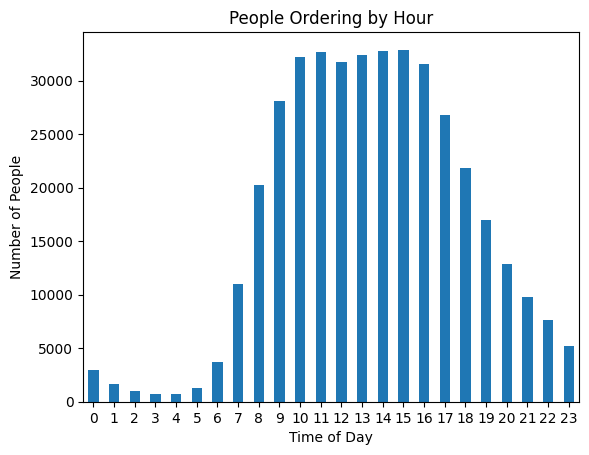

In [39]:
orders_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique()
orders_hour.plot(kind='bar', title='People Ordering by Hour', xlabel='Time of Day', 
                 ylabel='Number of People', rot=0);

The days in the middle of the month (9th to 17th) are the days when most people place orders.

Analyzing which day of the week people shop.

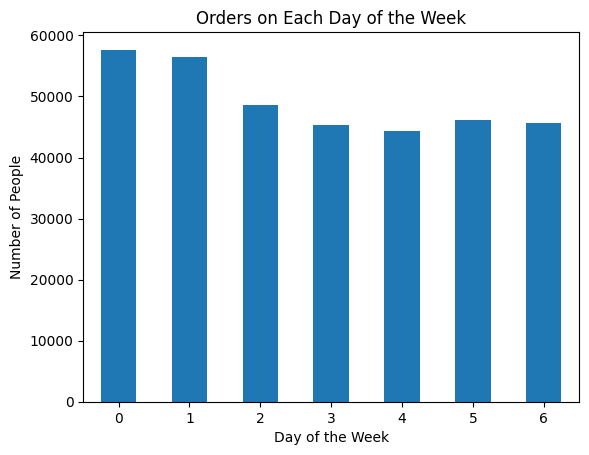

In [40]:
orders_dow = df_orders.groupby('order_dow')['user_id'].nunique()
orders_dow.plot(kind='bar', title='Orders on Each Day of the Week', xlabel='Day of the Week', 
                ylabel='Number of People', rot=0,);

More people shop on Sunday and Monday.

Analyzing how long people wait before placing another order.

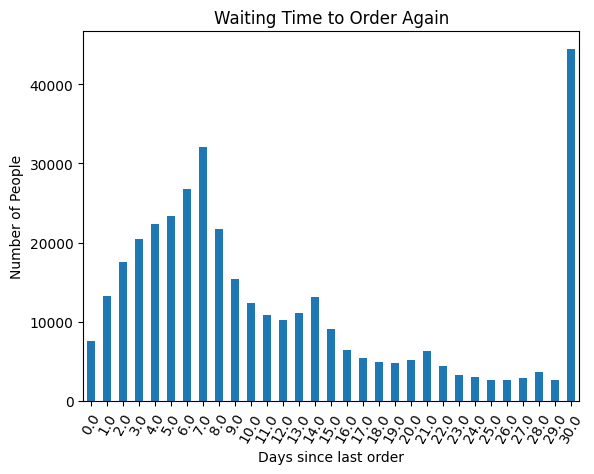

In [41]:
orders_since_prior = df_orders.groupby('days_since_prior_order')['user_id'].nunique()
orders_since_prior.plot(kind='bar', title='Waiting Time to Order Again', xlabel='Days since last order', 
                        ylabel='Number of People', rot=60,);

Many people order once every 7 days, but most order once every 30 days or more.

Analyzing differences on Wednesdays and Saturdays in `'order_hour_of_day'`.

In [42]:
# Filtering the data for the days of the week where we get Wednesdays and Saturdays.
wednesday = df_orders[df_orders['order_dow'] == 2]
saturday = df_orders[df_orders['order_dow'] == 5]

In [43]:
# Calculating the number of orders placed on these days at each hour of the day.
wed_count = wednesday['order_hour_of_day'].value_counts().sort_index()
sat_count = saturday['order_hour_of_day'].value_counts().sort_index()

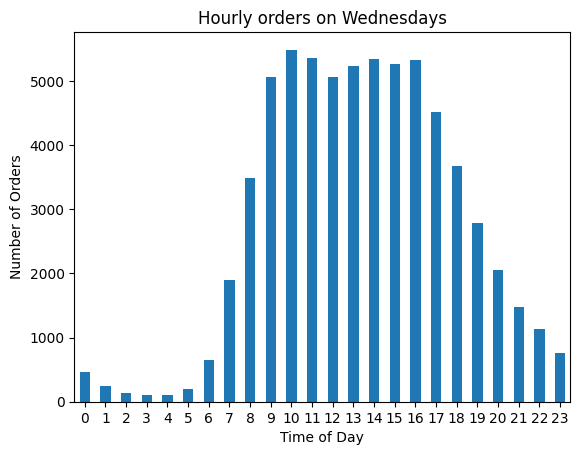

In [44]:
wed_count.plot(kind='bar', title='Hourly orders on Wednesdays', xlabel='Time of Day', 
               ylabel='Number of Orders', rot=0);

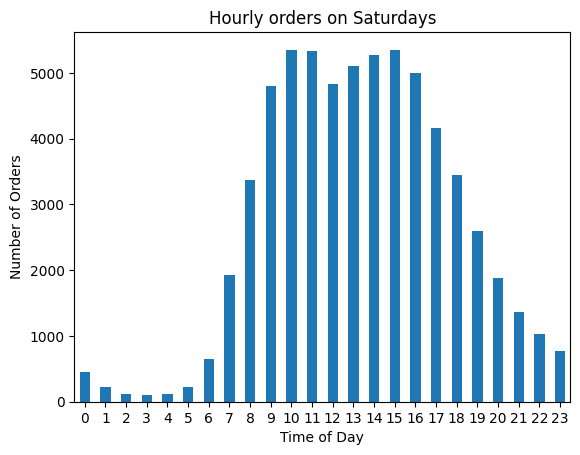

In [45]:
sat_count.plot(kind='bar', title='Hourly orders on Saturdays', xlabel='Time of Day', 
               ylabel='Number of Orders', rot=0);

The distribution of orders on these days is extremely similar, however you can notice a slight difference in that at most times there are more orders placed on Wednesdays.

Analyzing the distribution of the number of orders per customer.

In [46]:
# Counting every customer who has ever placed an order.
user_count = df_orders['user_id'].value_counts()
# Counting how many orders each customer has already placed.
orders_count = user_count.value_counts().sort_index()

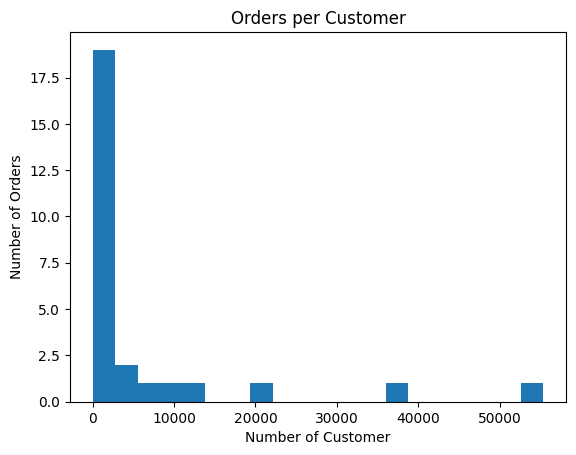

In [47]:
orders_count.plot(kind='hist', bins=20, title='Orders per Customer');
plt.xlabel('Number of Customer');
plt.ylabel('Number of Orders');

The vast majority of customers placed an order only once, and the greater the number of orders, the smaller the number of customers who placed that number of orders.

Analyzing which are the 20 most popular products.

In [48]:
# Merging the required dataframes.
df_merged = pd.merge(df_products, df_order_products, on='product_id')

In [49]:
# Grouping and counting how many times each product appears.
most_pop_products = df_merged.groupby(['product_id', 'product_name']).size().reset_index(name='count')
# Sorting the products and picking the 20 most popular.
top_products = most_pop_products.sort_values(by='count', ascending=False).head(20)

In [50]:
top_products[['product_id', 'product_name', 'count']]

,product_id,product_name,count
22808,24852,banana,66050
12025,13176,bag of organic bananas,53297
19370,21137,organic strawberries,37039
20077,21903,organic baby spinach,33971
43271,47209,organic hass avocado,29773
43788,47766,organic avocado,24689
43663,47626,large lemon,21495
15364,16797,strawberries,20018
24047,26209,limes,19690
25556,27845,organic whole milk,19600


This way we can see our 20 most popular products, and we know that banana is the most popular of all.

Analyzing how many items people typically buy in one order. And how is the distribution look like.

In [51]:
# Grouping order_id to count the number of products in orders.
products_order = df_order_products.groupby('order_id')['product_id'].count()
products_order.max()

127

In [52]:
# Calculating the average number of products per order.Calculating the average number of products per order.
mean_products_order = products_order.mean()

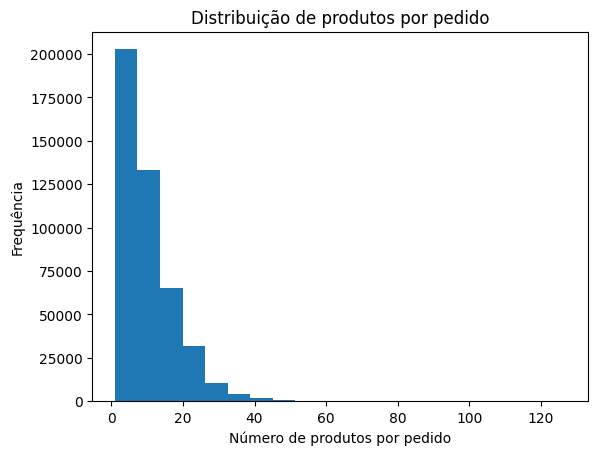

In [53]:
products_order.plot(kind='hist', bins=20, title='Distribuição de produtos por pedido');
plt.xlabel('Número de produtos por pedido');
plt.ylabel('Frequência');

The average number of products per order is approximately 10 products. And in the distribution in our histogram we see that very few people make purchases with more than 20 orders.

Analyzing which are the top 20 items that people put in their carts before everyone else.

In [54]:
# Counting and grouping the products that appear as the first product in the cart.
top_products = df_order_products[df_order_products['add_to_cart_order'] == 1].groupby('product_id').size().reset_index(name='count')

In [55]:
# Merging our created dataframe with the products dataframe to get the names of each product.
top_products = pd.merge(top_products, df_products[['product_id', 'product_name']], on='product_id')
# Sorting 20 products in descending order to obtain the item that most people put in the cart first.
top_firsts = top_products.sort_values(by='count', ascending=False).head(20)
top_firsts['count'] = top_firsts['count']

In [56]:
top_firsts[['product_id', 'product_name', 'count']]

,product_id,product_name,count
13414,24852,banana,15562
7127,13176,bag of organic bananas,11026
15028,27845,organic whole milk,4363
11384,21137,organic strawberries,3946
25439,47209,organic hass avocado,3390
11786,21903,organic baby spinach,3336
25732,47766,organic avocado,3044
10622,19660,spring water,2336
9050,16797,strawberries,2308
15102,27966,organic raspberries,2024


Now we can see our 20 products that are placed in the cart first, and we know that bananas are the product that people look for most as soon as they start shopping.